<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 6</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Matias Armijo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Operaciones para extracción de características.

### 1.1 Con un audio (voz o música) no mayor a 30 segundos, utilizando la libreria Librosa (https://librosa.org/), numpy, pytorch, implementa operaciones fundamentales como: 
- Media
- Kurtosis
- Skewness
- Zero Crossing Rate 
- Spectral Centroid
- Energía
- RMSE
- Frecuencia fundamental
<p align="justify">
Estas operaciones son fundamentales en el proceso de extracción de características. Explica el resultado obtenido y que significa cada uno.

Media = 1.84927366681187e-05
Kurtosis = 0.5476968288421631
Skewness (Oblicuidad) = -0.14241441406251398
Zero Crossing Rate = 4.618075801749271 %
Energia = 3600.8782
RMSE = 0.10800301999743042
Frecuencia fundamental: inf Hz


/tmp/ipykernel_3830/3330398956.py:91: RuntimeWarning: divide by zero encountered in divide
  fundamental_frequency_hz = float(fs) / fundamental_frequency


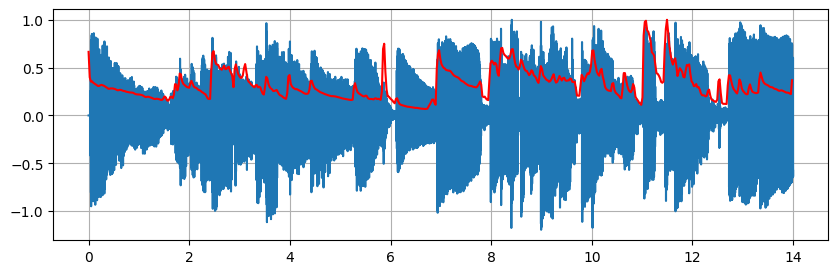

In [39]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa
import numpy as np
import torch

########### BORARA ESTA LIBRERIA ###########
import scipy

############################################

# Carga de archivos con libros
audio, fs = librosa.load("audio.wav")
duracion = len(audio)/fs
tiempo = np.linspace(0,duracion,len(audio))

# Obtencion de Media (mean)
def media_function(x):
    y = np.sum(x)/len(x)
    print('Media =', y)
    return y

media = media_function(audio)

# Obtencion Kurtosis
def kurtosis_function(x):
    media = np.mean(x)
    desviacion_estandar = np.std(x)
    kurtosis = np.mean(((x-media)/desviacion_estandar)**4)-3
    print('Kurtosis =', kurtosis)
    return kurtosis

kurtosis = kurtosis_function(audio)

# Obtencion Skewness
def skewness_function(x):
    media = np.mean(x)
    desviacion_estandar = np.std(x)
    n = len(x)
    skewness = (np.sum((x - media)**3) / (n * desviacion_estandar**3))
    print('Skewness (Oblicuidad) =', skewness)
    return skewness

skewness = skewness_function(audio)

# Obtencion Zero-Crossing-Rate
def zero_crossing_rate_function(x):
    cruces_por_cero = librosa.zero_crossings(x,pad=False)
    tasa_cruces_por_cero = sum(cruces_por_cero)/len(cruces_por_cero)
    print('Zero Crossing Rate =', tasa_cruces_por_cero*100,'%' )
    return tasa_cruces_por_cero

zero_crossing_rate = zero_crossing_rate_function(audio)

def spectral_centroid_function(audio,fs):
    spectral_centroids = librosa.feature.spectral_centroid(y=audio+0.1, sr=fs)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    return spectral_centroids, t

# obtencion del centroide del espectro
spectral_centroid, t = spectral_centroid_function(audio,fs)

plt.figure(figsize=(10,3))
plt.plot(tiempo,audio/max(audio))
plt.plot(t, spectral_centroid/max(spectral_centroid), color='r'); 
plt.grid(True)

# Energia del audio
def energy_function(x):
    energia = np.sum(x ** 2)
    print('Energia =', energia)
    return energia

energia = energy_function(audio)

# Obtencion del root mean square energy (RMSE)
def RMSE_function(x):
    RMSE = np.sqrt(1/len(x)*np.sum(audio ** 2))
    print('RMSE =',RMSE)
    return RMSE

RMSE = RMSE_function(audio)

def fundamental_freq_function(x,fs):
    autocorr = librosa.autocorrelate(x)
    # Encontrar el primer máximo después del primer retraso
    # Esto corresponde a la frecuencia fundamental
    fundamental_frequency = librosa.autocorrelate(x)[1:].argmax()
    # Convertir el índice a frecuencia (Hz)
    fundamental_frequency_hz = float(fs) / fundamental_frequency
    print("Frecuencia fundamental:", fundamental_frequency_hz, "Hz")
    return fundamental_frequency_hz

fundamental_freq = fundamental_freq_function(audio,fs)

Audio(audio,rate=fs)



Explicaciones

Media: 

## 2. Implementaciones

### 2.1 Utilizando Pytorch Audio obtenga el espectrograma del audio original
El espectrograma debe producirse para valores número de muestras para la transformada rápida de fourier de  32, 128, 512. 


### 2.2 Utilizando Pytorch audio y Librosa, implementa Mel Frequency Cepstral Coefficients (MFCCs) (opcional)

Sigue el siguiente ejemplo (https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial) y explica que significa el resultado obtenido, graficando los coeficientes en un espectrograma. Investiga sobre Cepstral Analysis.


### 3. Audio Processing
### 3.1 En matlab, del paquete de procesamiento de audio, debes elegir una función de la librería, estudiarla y hacer un ejemplo.

Debes enviar un informe en PDF de 1 (una) página explicando, el algoritmo seleccionado, como funciona y el ejemplo que desarrollaste. Incluye por lo menos un gráfico que demuestre el trabajo realizado. 

Debes subir a tu repositorio el código en matlab con dicha solución.

En el sitio  https://la.mathworks.com/help/audio/index.html?s_tid=CRUX_lftnav y https://la.mathworks.com/help/audio/audio-processing-algorithm-design.html, encuentras diferentes funciones para generar efectos como reverberancia o control de la onda (compresores, gates, etc)

Así mismo, en el sitio https://la.mathworks.com/help/signal/measurements-and-feature-extraction.html, encuentras ejemplos para extracción de caracteristicas de la señal de audio, por ejemplo métricas de pulso y de transición.


    

## 5. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[MFCC]https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

[Cepstrum]https://www.kuniga.me/blog/2021/12/11/pitch-via-cepstrum.html

[LPC] https://www.youtube.com/watch?v=DIr6SPdK4NA

[LPC] https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

[MFCC] https://librosa.org/doc/0.10.1/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

[MFCC] https://pytorch.org/audio/main/generated/torchaudio.transforms.MFCC.html
